In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [36]:
df = pd.read_csv(r"D:\data sets\Top rated movies\Top_rated_movies1.csv")


In [37]:
df.info


<bound method DataFrame.info of           id                                 title  \
0     168705                            BloodRayne   
1      19766                    Inspector Gadget 2   
2     248705            The Visitors: Bastille Day   
3      17711  The Adventures of Rocky & Bullwinkle   
4        580                     Jaws: The Revenge   
...      ...                                   ...   
8826   12142                     Alone in the Dark   
8827    5491                     Battlefield Earth   
8828   11059                     House of the Dead   
8829   14164                  Dragonball Evolution   
8830   40016            Birdemic: Shock and Terror   

                                               overview  popularity  \
0     In 18th-century Romania, after spending much o...      17.499   
1     After capturing Claw, all the criminals have g...      20.772   
2     Stuck in the corridors of time, Godefroy de Mo...      18.828   
3     Rocky and Bullwinkle have bee

In [38]:
df.head(10)

,id,title,overview,popularity,release_date,vote_average,vote_count
0,168705,BloodRayne,"In 18th-century Romania, after spending much o...",17.499,2005-10-22,4.105,501
1,19766,Inspector Gadget 2,"After capturing Claw, all the criminals have g...",20.772,2003-03-11,4.100,342
2,248705,The Visitors: Bastille Day,"Stuck in the corridors of time, Godefroy de Mo...",18.828,2016-03-23,4.090,636
3,17711,The Adventures of Rocky & Bullwinkle,Rocky and Bullwinkle have been living off the ...,16.436,2000-06-30,4.075,335
4,580,Jaws: The Revenge,"After another deadly shark attack, Ellen Brody...",30.996,1987-07-17,4.064,931
5,21435,French Fried Vacations 3: Friends Forever,"After the Club Med and skiing, what happened t...",9.060,2006-02-01,4.058,680
6,8046,Gigli,Gigli is ordered to kidnap the psychologically...,14.759,2003-08-01,4.042,426
7,7278,Meet the Spartans,"The heroic Leonidas, armed with nothing but le...",45.963,2008-01-24,4.000,1555
8,17473,The Room,Johnny is a successful banker with great respe...,14.775,2003-06-27,4.035,1298
9,505423,Wounds,Disturbing and mysterious things begin to happ...,21.921,2019-01-26,4.021,739


In [39]:
df.describe()

,id,popularity,vote_average,vote_count
count,8.831000e+03,8831.000000,8831.000000,8831.000000
mean,1.775555e+05,33.136177,6.639059,1969.126486
std,2.352400e+05,49.108903,0.794924,3059.560533
min,5.000000e+00,0.600000,2.106000,1.000000
25%,9.927500e+03,16.729000,6.113500,469.000000
50%,3.387500e+04,23.804000,6.662000,846.000000
75%,3.345215e+05,35.751500,7.205000,1966.000000
max,1.151534e+06,1766.305000,8.708000,34794.000000


In [40]:
df.isna().sum()


id              0
title           0
overview        1
popularity      0
release_date    0
vote_average    0
vote_count      0
dtype: int64

<Axes: xlabel='popularity', ylabel='Count'>

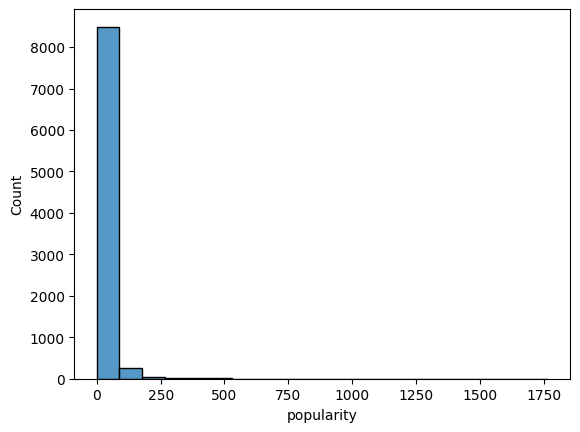

In [41]:
# Distribution of Popularity

sns.histplot(data=df, x='popularity', bins=20)


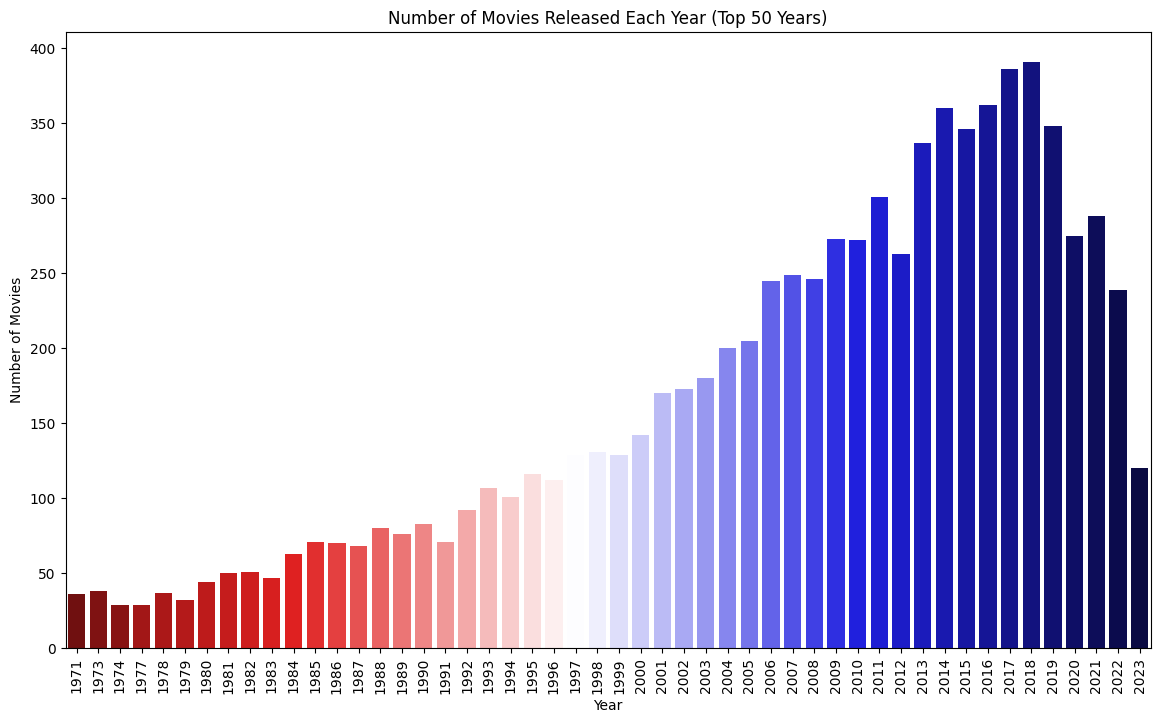

In [54]:
# Number of Movies Released Each Year
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

top_years = df['release_year'].value_counts().nlargest(50).index
df_top_years = df[df['release_year'].isin(top_years)]

plt.figure(figsize=(14, 8))
sns.countplot(x='release_year', data=df_top_years, palette='seismic_r', legend=False, hue='release_year')
plt.title('Number of Movies Released Each Year (Top 50 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

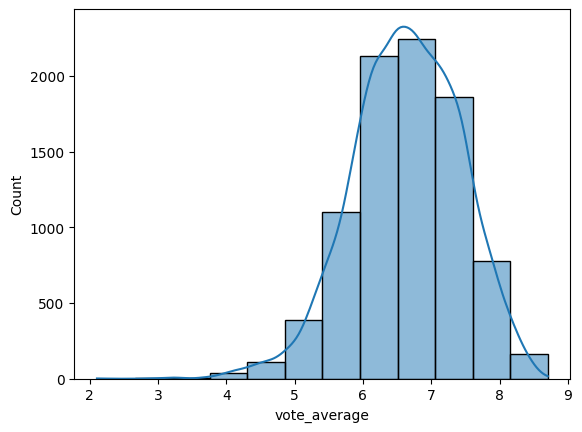

In [43]:
# Vote Avarage Distribution

fig = sns.histplot(df, x='vote_average', bins=12, kde=True)
                   

<Figure size 1400x800 with 0 Axes>

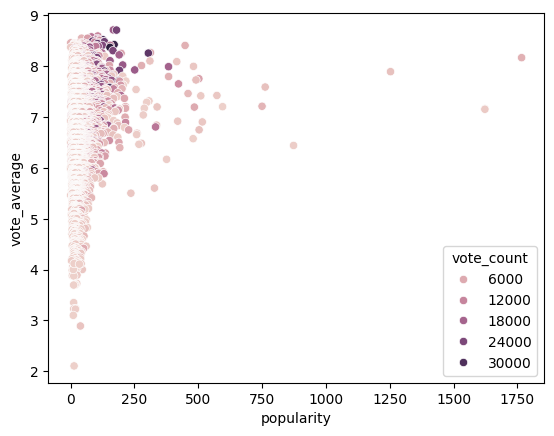

<Figure size 1400x800 with 0 Axes>

In [44]:
sns.scatterplot(data=df, x='popularity', y='vote_average', hue='vote_count')

plt.figure(figsize=(14,8))

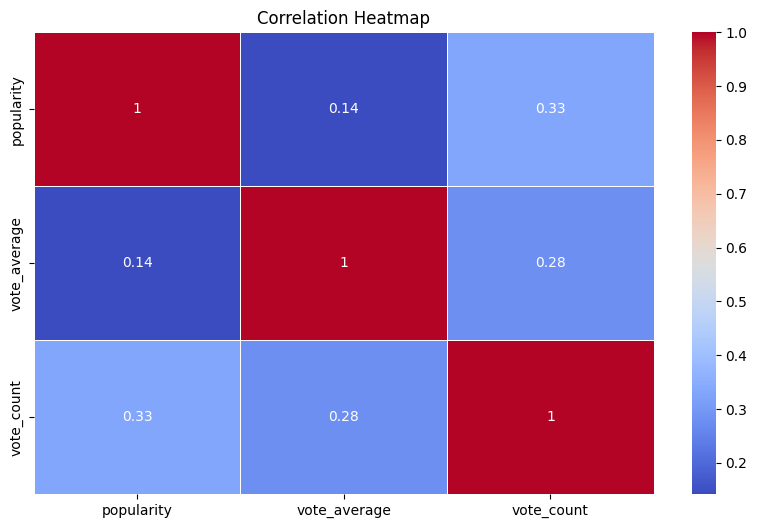

In [45]:
# Correlation hearmap
corr_matrix = df[['popularity', 'vote_average', 'vote_count']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Yurii\AppData\Local\Temp\ipykernel_7712\3918884920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_count', y='title', data=top_votes, palette='Blues_d')


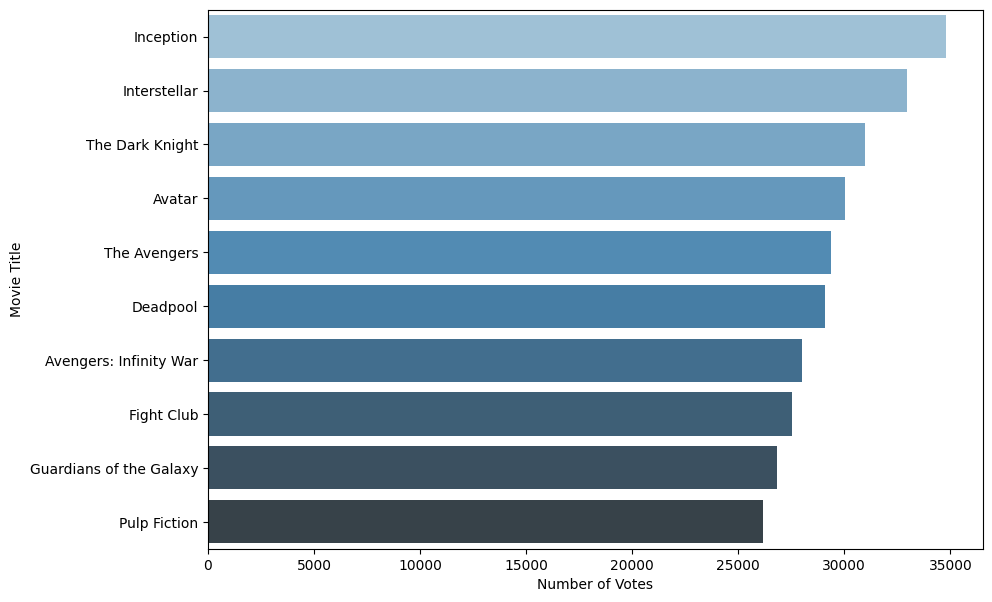

In [46]:
top_votes = df.nlargest(10, 'vote_count')

plt.figure(figsize=(10, 7))
sns.barplot(x='vote_count', y='title', data=top_votes, palette='Blues_d')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.show()


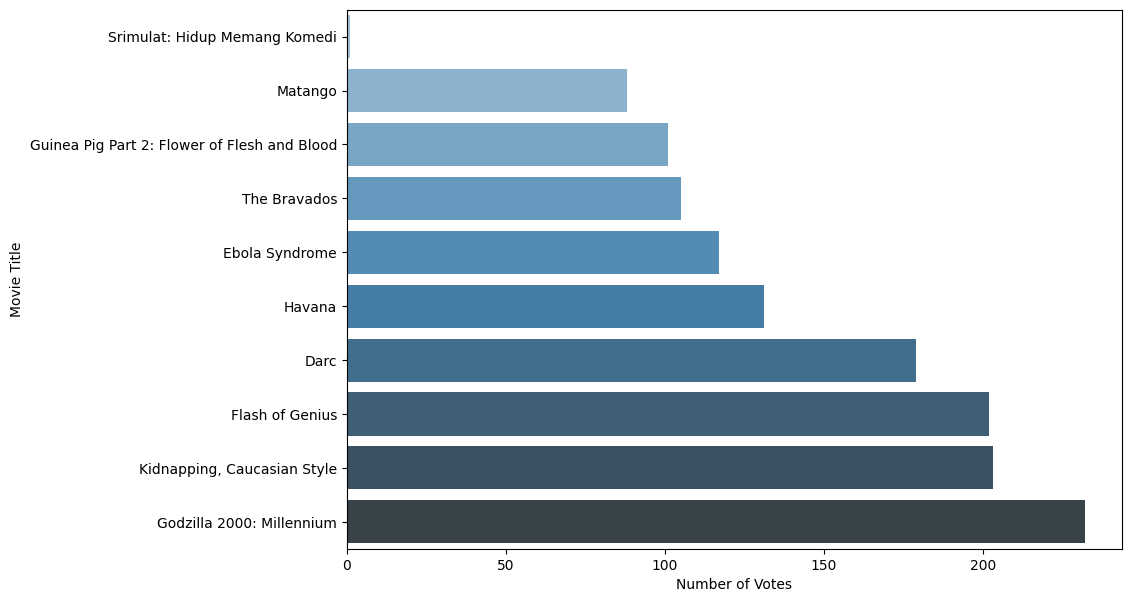

In [47]:
top_votes = df.nsmallest(10, 'vote_count')

plt.figure(figsize=(10, 7))
sns.barplot(x='vote_count', y='title', data=top_votes, palette='Blues_d', hue='title', legend=False)
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.show()

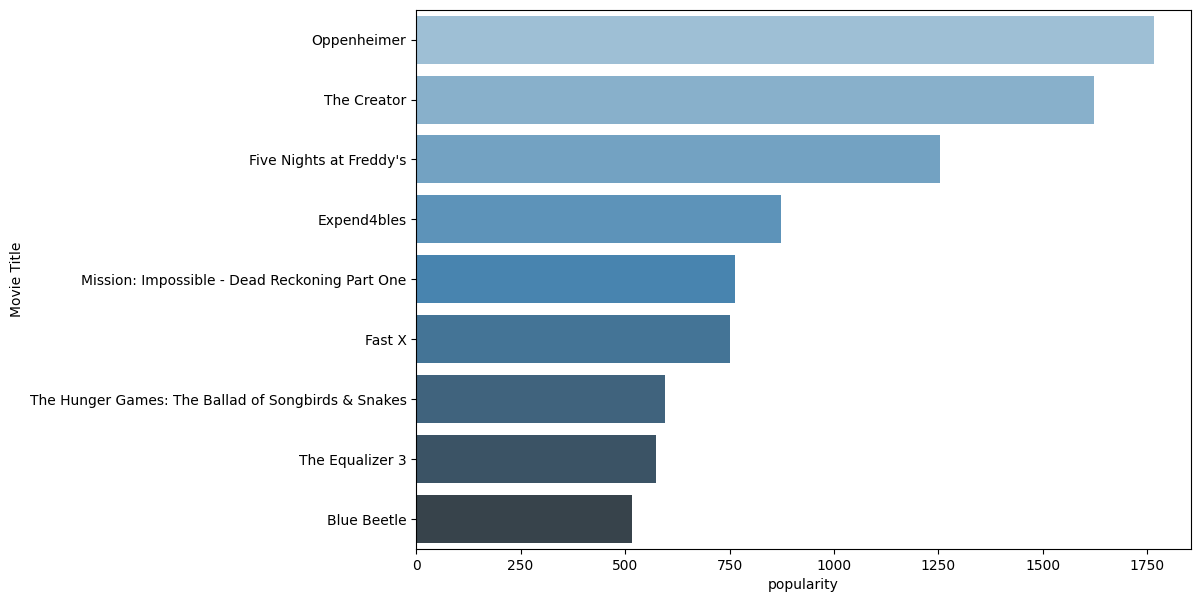

In [48]:
    ###TOP 10 MOVIES WITH HIGHEST POPULARITY
top_votes = df.nlargest(10, 'popularity')

plt.figure(figsize=(10, 7))
sns.barplot(x='popularity', y='title', data=top_votes, palette='Blues_d', hue='title', legend=False)
plt.ylabel('Movie Title')
plt.show()


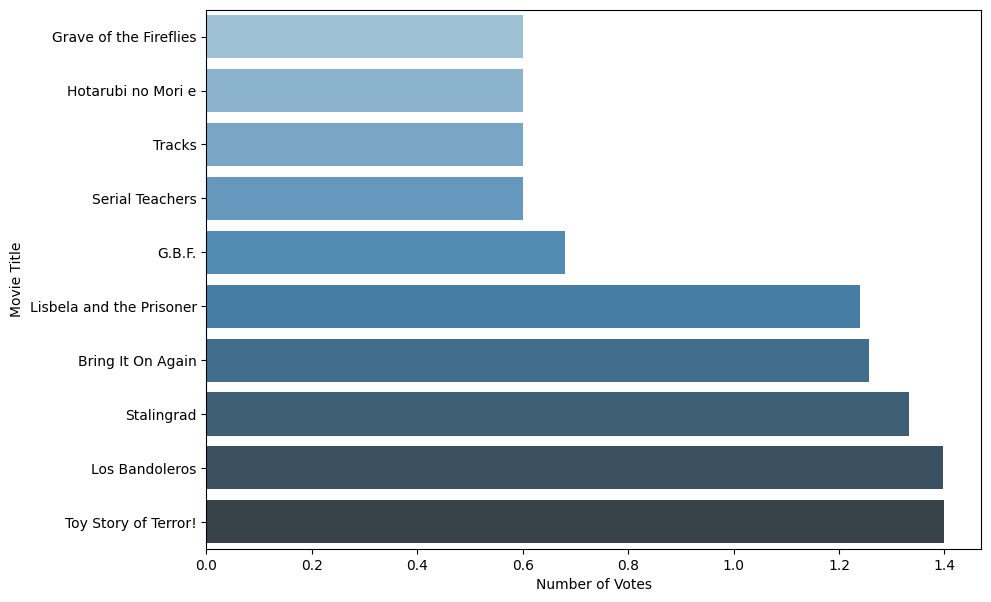

In [49]:
# Bottom 10 Movies with lowest Popularity
top_votes = df.nsmallest(10, 'popularity')

plt.figure(figsize=(10, 7))
sns.barplot(x='popularity', y='title', data=top_votes, palette='Blues_d', hue='title', legend=False)
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.show()


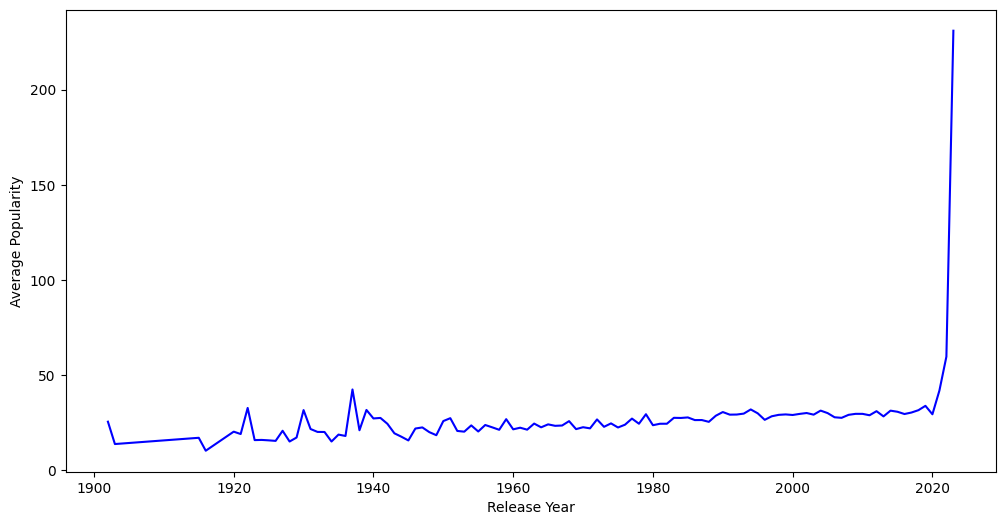

In [50]:
time_series_data = df.groupby('release_year').agg({'popularity': 'mean', 'vote_count': 'mean'}).reset_index()

# Plotting Time Series for Popularity
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='popularity', data=time_series_data, color='blue')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()